In [60]:
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# Data description

Data source: https://archive.ics.uci.edu/dataset/186/wine+quality or https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data

The set of 11 attributes/variables based on physicochemical tests and 1 variable describing quality.

|Attribute|Description|
|:-------|:-------|
|fixed acidity|most acids involved with wine or fixed or nonvolatile (do not evaporate readily)|
|volatile acidity|the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste|
|citric acid|found in small quantities, citric acid can add 'freshness' and flavor to wines|
|residual sugar|the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet|
|chlorides|the amount of salt in the wine|
|free sulfur dioxide|the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine|
|total sulfur dioxide|amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine|
|density|the density of water is close to that of water depending on the percent alcohol and sugar content|
|pH|describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale|
|sulphates|a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant|
|alcohol|the percent alcohol content of the wine|
|quality|output variable (based on sensory data, score between 0 and 10)

# Data loading

In [61]:
df = pd.read_csv('../datasets/data_clustering/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [62]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


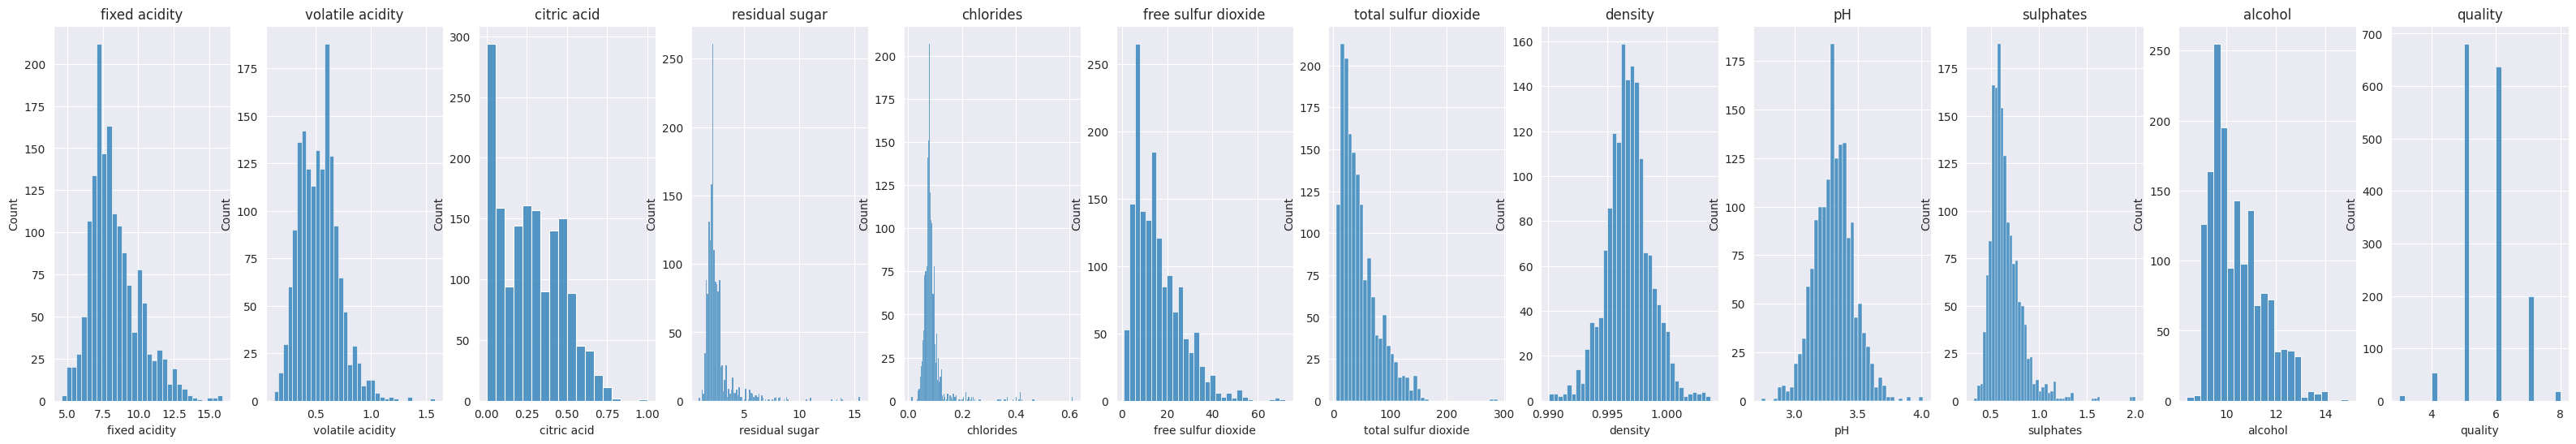

In [63]:
df_only_numeric = df.select_dtypes(np.number)

# Create the subplots
n_rows, n_cols = df_only_numeric.shape
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(40, 6))
for i, column in enumerate(df_only_numeric):
    sns.histplot(data=df_only_numeric, x=column, ax=axes[i]).set_title(column)

In [64]:
df.quality.value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [65]:
df['quality_class'] = 'normal'
df.loc[df.quality <= 4, 'quality_class'] = 'bad'
df.loc[df.quality >= 7, 'quality_class'] = 'good'
df.quality_class.value_counts()

quality_class
normal    1319
good       217
bad         63
Name: count, dtype: int64

In [66]:
sns.heatmap(df_only_numeric.corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

Error in callback <function flush_figures at 0x729b5d3a2f20> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [67]:
top_5_features_for_quality = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'chlorides']

# Data preprocessing before clustering
- Why do we need to preprocess the data?

In [68]:
X = df_only_numeric.drop(columns=['quality']).values

In [69]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_min_max_scaled = scaler.fit_transform(X)
X_min_max_scaled

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

# Clustering

## KMeans + clustering quality
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- Do you know any technique to determine the best number of clusters?

In [70]:
clustering = sklearn.cluster.KMeans(n_clusters=5)
clustering.fit(X_min_max_scaled)

KMeans(n_clusters=5)

In [71]:
clustering.labels_

array([3, 3, 3, ..., 1, 1, 2], dtype=int32)

In [72]:
pd.Series(clustering.labels_).value_counts()

3    528
0    340
4    298
2    237
1    196
Name: count, dtype: int64

In [73]:
clustering.inertia_

167.31520493715848

In [74]:
sklearn.metrics.silhouette_score(X_min_max_scaled, clustering.labels_)

np.float64(0.19901179853851422)

## Elbow method

#### Calculate SSE and Silhouette for differenet parameters of clusters $k \in <2, 15>$. Create visualization for both of clustering quality criteria

In [75]:
clustering_scores = []
for k in range(2, 16):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(X_min_max_scaled)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X_min_max_scaled, clustering.labels_),
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores

,k,sse,silhouette
0,2,239.183110,0.244505
1,3,209.323136,0.212750
2,4,184.475613,0.210233
3,5,172.925306,0.156733
4,6,158.793292,0.158629
5,7,151.676183,0.159532
6,8,149.131704,0.125598
7,9,138.694069,0.136332
8,10,131.869810,0.149369
9,11,129.870629,0.141003


<Axes: xlabel='k', ylabel='sse'>

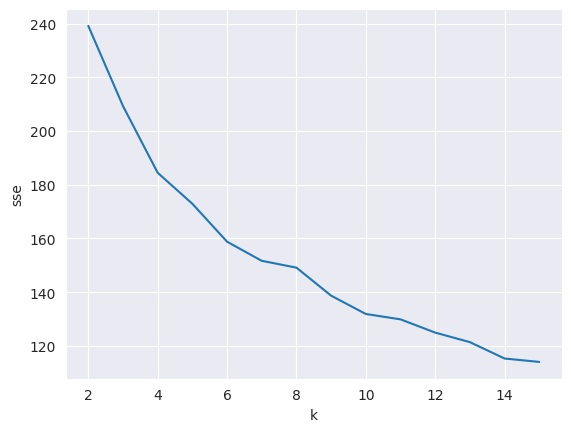

In [76]:
sns.lineplot(data=df_clustering_scores, x='k', y='sse')

<Axes: xlabel='k', ylabel='silhouette'>

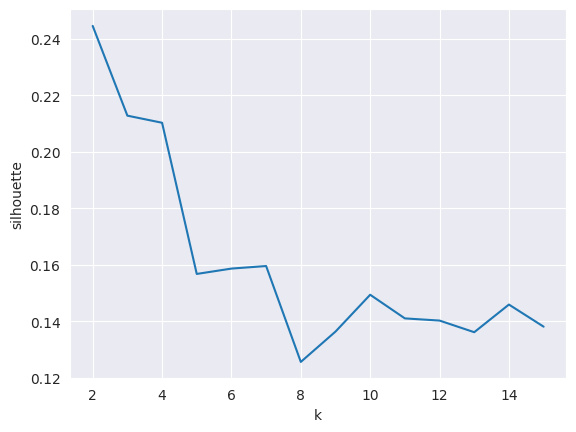

In [77]:
sns.lineplot(data=df_clustering_scores, x='k', y='silhouette')

#### How many cluster do you see ?

#### Can you imagine other quality criteria to use over some real dataset? Do you know difference between external and internal criteria?

## Clustering interpretation

In [78]:
clustering = sklearn.cluster.KMeans(n_clusters=6, random_state=13)
clustering.fit(X_min_max_scaled)

KMeans(n_clusters=6, random_state=13)

In [79]:
df['cluster_id'] = clustering.labels_

<Axes: xlabel='cluster_id', ylabel='count'>

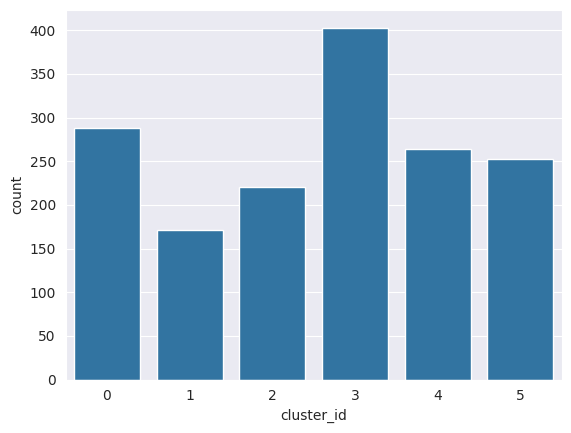

In [80]:
sns.countplot(data=df, x='cluster_id')

#### Let's take a look on the centroids

In [81]:
df.select_dtypes(np.number).groupby('cluster_id').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster_id,,,,,,,,,,,,
0,8.373958,0.540868,0.271493,2.267014,0.091635,11.118056,46.041667,0.997242,3.263264,0.633299,9.711458,5.399306
1,6.363743,0.598684,0.094094,2.259064,0.067345,19.198830,44.421053,0.994086,3.501637,0.634152,11.851657,5.906433
2,8.432727,0.348932,0.415045,2.424318,0.073909,12.786364,29.677273,0.995252,3.282045,0.708318,11.700455,6.372727
3,7.296526,0.662891,0.067146,2.264640,0.083442,13.088089,34.672457,0.996566,3.400099,0.595806,9.985815,5.342432
4,8.243939,0.517860,0.314167,3.257008,0.089830,30.509470,93.810606,0.997457,3.285152,0.661970,9.868434,5.352273
5,11.190119,0.415870,0.544269,2.824111,0.112055,10.897233,32.324111,0.998828,3.147431,0.754348,10.431489,5.845850


#### Use describe() for quick inspection of numeric values in dataset.

In [82]:
with pd.option_context('display.max_columns', None):
    display(df.groupby('cluster_id').describe(include='object'))

quality_class                    
                   count unique     top freq
cluster_id                                  
0                    288      3  normal  271
1                    171      3  normal  134
2                    220      3  normal  122
3                    403      3  normal  352
4                    264      3  normal  246
5                    253      3  normal  194

In [83]:
with pd.option_context('display.max_columns', None):
    display(df.groupby('cluster_id').describe(exclude='object'))

fixed acidity                                                    \
                   count       mean       std  min   25%   50%   75%   max   
cluster_id                                                                   
0                  288.0   8.373958  0.948820  5.2   7.7   8.3   9.1  10.7   
1                  171.0   6.363743  0.775262  4.6   5.9   6.4   6.8   8.4   
2                  220.0   8.432727  1.085152  6.0   7.6   8.4   9.1  10.8   
3                  403.0   7.296526  0.670774  5.4   6.9   7.2   7.7   9.1   
4                  264.0   8.243939  1.133067  5.6   7.4   8.0   9.0  11.8   
5                  253.0  11.190119  1.465781  7.7  10.4  11.1  12.0  15.9   

           volatile acidity                                                   \
                      count      mean       std   min      25%    50%    75%   
cluster_id                                                                     
0                     288.0  0.540868  0.141005  0.22  0.43000  0.545  0.635   
1                     171.0  0.598684  0.154196  0.28  0.50000  0.580  0.670   
2                     220.0  0.348932  0.089081  0.12  0.29875  0.340  0.400   
3                     403.0  0.662891  0.158293  0.31  0.56000  0.640  0.725   
4                     264.0  0.517860  0.165561  0.18  0.40000  0.495  0.610   
5                     253.0  0.415870  0.125522  0.18  0.32000  0.400  0.480   

                  citric acid                                                  \
              max       count      mean       std   min     25%    50%    75%   
cluster_id                                                                      
0           0.935       288.0  0.271493  0.092545  0.09  0.2200  0.255  0.320   
1           1.090       171.0  0.094094  0.103763  0.00  0.0100  0.080  0.145   
2           0.760       220.0  0.415045  0.086882  0.24  0.3500  0.410  0.460   
3           1.580       403.0  0.067146  0.064492  0.00  0.0100  0.050  0.100   
4           1.240       264.0  0.314167  0.130288  0.00  0.2375  0.310  0.390   
5           0.890       253.0  0.544269  0.099873  0.24  0.4900  0.520  0.630   

                 residual sugar                                           \
             max          count      mean       std  min  25%   50%  75%   
cluster_id                                                                 
0           0.61          288.0  2.267014  0.941192  1.3  1.9  2.10  2.4   
1           0.66          171.0  2.259064  0.907658  1.2  1.8  2.10  2.3   
2           0.68          220.0  2.424318  1.156158  0.9  1.9  2.15  2.5   
3           0.25          403.0  2.264640  0.804277  1.2  1.8  2.10  2.4   
4           0.78          264.0  3.257008  2.361180  1.4  2.0  2.50  3.2   
5           1.00          253.0  2.824111  1.462118  1.4  2.1  2.50  3.0   

                 chlorides                                                  \
             max     count      mean       std    min    25%    50%    75%   
cluster_id                                                                   
0           11.0     288.0  0.091635  0.041898  0.050  0.076  0.083  0.092   
1            8.3     171.0  0.067345  0.019378  0.012  0.054  0.068  0.077   
2           12.9     220.0  0.073909  0.023580  0.038  0.062  0.071  0.079   
3            6.0     403.0  0.083442  0.023840  0.039  0.073  0.079  0.088   
4           15.4     264.0  0.089830  0.032154  0.045  0.074  0.082  0.094   
5           15.5     253.0  0.112055  0.090728  0.050  0.074  0.085  0.104   

                  free sulfur dioxide                                          \
              max               count       mean        std   min   25%   50%   
cluster_id                                                                      
0           0.401               288.0  11.118056   5.057160   1.0   7.0  11.0   
1           0.161               171.0  19.198830  10.379629   3.0  12.0  17.0   
2           0.230               220.0  12.786364   8.259202   3.

In [84]:
with pd.option_context('display.max_columns', None):
    display(df.select_dtypes(np.number).groupby('cluster_id').agg(['mean', 'min', 'max']))

fixed acidity            volatile acidity              citric acid  \
                    mean  min   max             mean   min    max        mean   
cluster_id                                                                      
0               8.373958  5.2  10.7         0.540868  0.22  0.935    0.271493   
1               6.363743  4.6   8.4         0.598684  0.28  1.090    0.094094   
2               8.432727  6.0  10.8         0.348932  0.12  0.760    0.415045   
3               7.296526  5.4   9.1         0.662891  0.31  1.580    0.067146   
4               8.243939  5.6  11.8         0.517860  0.18  1.240    0.314167   
5              11.190119  7.7  15.9         0.415870  0.18  0.890    0.544269   

                       residual sugar            chlorides                \
             min   max           mean  min   max      mean    min    max   
cluster_id                                                                 
0           0.09  0.61       2.267014  1.3  11.0  0.091635  0.050  0.401   
1           0.00  0.66       2.259064  1.2   8.3  0.067345  0.012  0.161   
2           0.24  0.68       2.424318  0.9  12.9  0.073909  0.038  0.230   
3           0.00  0.25       2.264640  1.2   6.0  0.083442  0.039  0.267   
4           0.00  0.78       3.257008  1.4  15.4  0.089830  0.045  0.337   
5           0.24  1.00       2.824111  1.4  15.5  0.112055  0.050  0.611   

           free sulfur dioxide             total sulfur dioxide               \
                          mean   min   max                 mean   min    max   
cluster_id                                                                     
0                    11.118056   1.0  25.0            46.041667   9.0  115.0   
1                    19.198830   3.0  51.0            44.421053   7.0  119.0   
2                    12.786364   3.0  43.0            29.677273   6.0  149.0   
3                    13.088089   3.0  40.0            34.672457   7.0  101.0   
4                    30.509470  12.0  72.0            93.810606  44.0  289.0   
5                    10.897233   3.0  38.0            32.324111   6.0  101.0   

             density                          pH             sulphates        \
                mean      min      max      mean   min   max      mean   min   
cluster_id                                                                     
0           0.997242  0.99458  1.00150  3.263264  2.87  3.61  0.633299  0.42   
1           0.994086  0.99020  0.99648  3.501637  3.22  4.01  0.634152  0.37   
2           0.995252  0.99007  0.99814  3.282045  2.89  3.56  0.708318  0.44   
3           0.996566  0.99396  1.00025  3.400099  3.02  3.69  0.595806  0.33   
4           0.997457  0.99120  1.00369  3.285152  2.93  3.53  0.661970  0.40   
5           0.998828  0.99572  1.00320  3.147431  2.74  3.54  0.754348  0.43   

                    alcohol               quality          
             max       mean   min   max      mean min max  
cluster_id                                                 
0           1.59   9.711458   8.7  11.3  5.399306   4   8  
1           0.94  11.851657  10.2  14.0  5.906433   4   8  
2           1.16  11.700455  10.1  14.0  6.372727   4   8  
3           1.08   9.985815   9.0  11.5  5.342432   3   7  
4           1.98   9.868434   8.5  12.3  5.352273   3   7  
5           2.00  10.431489   8.4  14.9  5.845850   3   8

### Graphical ilustration of values in the clusters

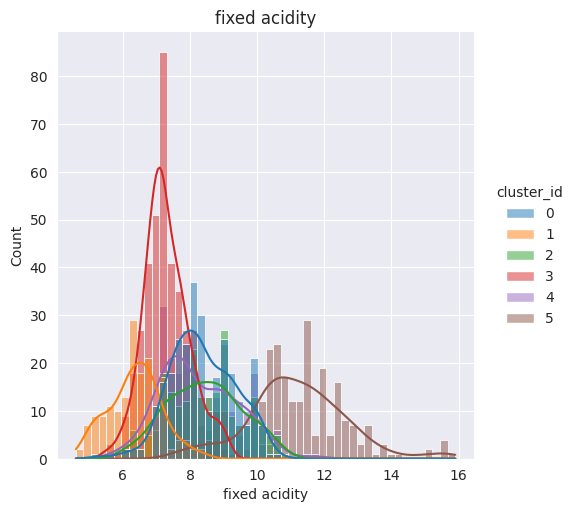

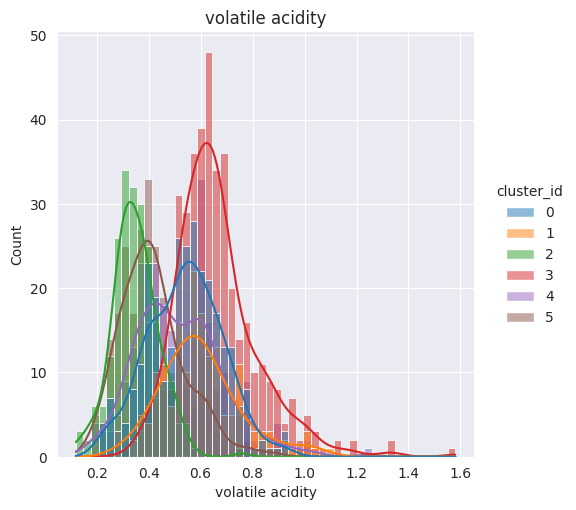

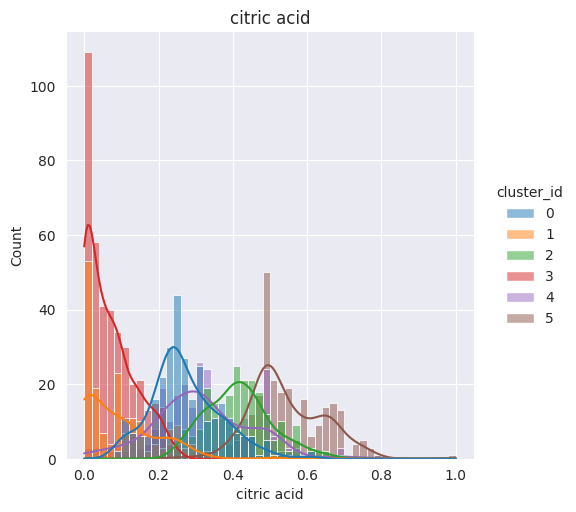

KeyboardInterrupt: 

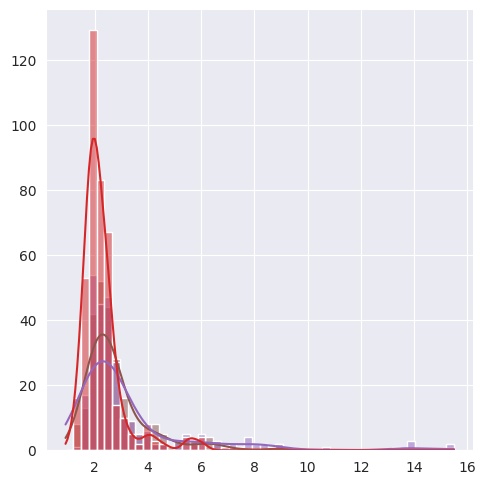

In [85]:
for column in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']:
    sns.displot(data=df, x=column, hue='cluster_id', palette='tab10', kde=True, bins=50)
    plt.title(column)
    plt.show()

In [ ]:
for column in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']:
    sns.boxplot(data=df, y=column, x='cluster_id')
    plt.title(column)
    plt.show()

#### Are there any differences attributes for different clusters?

#### Clusters possible interpretation

For cluster 0 there are lower *volatile acidity* values. 

The cluster 1 represents the wines with high *fixed acidity* and *citric acid* values.

The biggest cluster 2 (consisted of 536 points out of total 1599 points) has small sulfur values and relatively small residual sugar.

etc...

### Can we see differences in wine quality for different clusters?

In [ ]:
sns.boxplot(data=df, y='quality', x='cluster_id')

In [ ]:
df.groupby('cluster_id').quality.value_counts().head(20)

In [ ]:
df_quality_in_clusters = pd.pivot(df.groupby('cluster_id').quality.value_counts().reset_index(name='count'),
                                  index='quality', columns=['cluster_id'], values='count')
df_quality_in_clusters.fillna(0, inplace=True)
df_quality_in_clusters

In [ ]:
sns.heatmap((df_quality_in_clusters / df_quality_in_clusters.sum(axis=0)).sort_index(ascending=False), cmap='YlOrBr',
            vmin=0, vmax=1, annot=True, fmt='.1%')

In [ ]:
sns.heatmap((df_quality_in_clusters.T / df_quality_in_clusters.sum(axis=1)).T.sort_index(ascending=False),
            cmap='YlOrBr', vmin=0, vmax=1, annot=True, fmt='.1%')

#### How can we interpret previous illustrations?

#### Description of clusters based on its quality values:

- TODO: Fill in some observations

## DBSCAN + distance analysis
- https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

We are going to use only top 5 selected features with the highest correlation to quality for following clustering.

In [ ]:
top_5_features_for_quality

In [ ]:
sns.pairplot(data=df[top_5_features_for_quality + ['quality_class']], hue='quality_class')

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_min_max_scaled = scaler.fit_transform(df[top_5_features_for_quality].values)

In [ ]:
clustering = sklearn.cluster.DBSCAN()
clustering.fit(X_min_max_scaled)

In [ ]:
pd.Series(clustering.labels_).value_counts()

What does the number -1 means?
#### Find better parameters *eps* and *min_pts* and visualize you result

In [ ]:
clustering = sklearn.cluster.DBSCAN(eps=0.25, min_samples=10).fit(X_min_max_scaled)
pd.Series(clustering.labels_).value_counts()

#### Lets get insight into distances in our dataset, to allow us to find better configuration of parameters for DBSCAN

In [ ]:
distance_matrix = scipy.spatial.distance_matrix(X_min_max_scaled, X_min_max_scaled)
distance_matrix

In [ ]:
sns.histplot(distance_matrix.flatten())

In [ ]:
distance_matrix = scipy.spatial.distance_matrix(X_min_max_scaled, X_min_max_scaled)
distance_matrix.sort(axis=1)
distance_matrix

In [ ]:
sns.histplot(distance_matrix[:, 1])

In [ ]:
sns.histplot(distance_matrix[:, 10], bins=50)

#### What can we notice in previous visualizations?

In [ ]:
clustering = sklearn.cluster.DBSCAN(eps=0.07, min_samples=10).fit(X_min_max_scaled)
pd.Series(clustering.labels_).value_counts()

#### Description of clusters (and probably noise points too)

- We should consider removing -1 cluster out of interpretation section

In [ ]:
df['cluster_id'] = clustering.labels_

In [ ]:
df.groupby('cluster_id').quality_class.value_counts()

In [ ]:
df_quality_in_clusters = pd.pivot(df.groupby('cluster_id').quality.value_counts().reset_index(name='count'),
                                  index='quality', columns=['cluster_id'], values='count')
df_quality_in_clusters.fillna(0, inplace=True)
df_quality_in_clusters.sort_index(ascending=False)

In [ ]:
sns.heatmap((df_quality_in_clusters / df_quality_in_clusters.sum(axis=0)).sort_index(ascending=False), cmap='YlOrBr',
            vmin=0, vmax=1, annot=True, fmt='.1%')

In [ ]:
colorpalette = dict([(i, sns.color_palette('tab10')[i]) for i in range(10)])
colorpalette[-1] = (0.8, 0.8, 0.8)
colorpalette

In [ ]:
sns.pairplot(data=df[top_5_features_for_quality + ['cluster_id']], hue='cluster_id', palette=colorpalette,
             plot_kws={'alpha': 0.6})

In [ ]:
sns.pairplot(data=df[df.cluster_id != -1][top_5_features_for_quality + ['cluster_id']].sort_values('cluster_id',
                                                                                                   ascending=False),
             hue='cluster_id', palette=colorpalette, plot_kws={'alpha': 0.6})

### Discussion: What to do with group cluster_id=-1? Should it be included or excluded from clustering interpretation?

#### There goes further description of clusters...

## Is the scaling of the feature good?

In [ ]:
sns.histplot(data=df_only_numeric, x='fixed acidity')

In [ ]:
sns.histplot(data=df, x='total sulfur dioxide')

In [ ]:
sns.histplot(data=df, x='residual sugar')

In [ ]:
distance_matrix_first_column = scipy.spatial.distance_matrix(scaler.fit_transform(df[['fixed acidity']]),
                                                             scaler.fit_transform(df[['fixed acidity']]))
distance_matrix_second_column = scipy.spatial.distance_matrix(scaler.fit_transform(df[['total sulfur dioxide']]),
                                                              scaler.fit_transform(df[['total sulfur dioxide']]))
distance_matrix_third_column = scipy.spatial.distance_matrix(scaler.fit_transform(df[['residual sugar']]),
                                                             scaler.fit_transform(df[['residual sugar']]))

In [ ]:
distance_matrix_first_column[np.triu_indices_from(distance_matrix_first_column, k=1)]

In [ ]:
sns.histplot(distance_matrix_first_column[np.triu_indices_from(distance_matrix_first_column, k=1)], bins=50)

In [ ]:
sns.histplot(distance_matrix_second_column[np.triu_indices_from(distance_matrix_second_column, k=1)], bins=50)

In [ ]:
sns.histplot(distance_matrix_third_column[np.triu_indices_from(distance_matrix_third_column, k=1)], bins=50)

### How would you treat non-numerical attributes during preprocessing?

### For more info about Sklearn clustering, take a look into documentation https://scikit-learn.org/stable/modules/clustering.html#clustering

# Tasks (2p)

## Part 1 
Continue with clustering analysis:

MinMax scaling is not the only best possibility for scaling of numerical attributes.

1. Take a look into documentation (https://scikit-learn.org/stable/modules/classes.html?highlight=preprocessing#module-sklearn.preprocessing) and choose other method for scaling your features.

2. Apply clustering method of your choice (https://scikit-learn.org/stable/modules/clustering.html) for differently scaled data.

3. Describe detected clusters.

As a bonus (voluntary), it may be interesting to combine differently scaled features - e.g. feature1 scaled using MinMax, feature2 scaled using PowerTransform etc. And used this dataset for clustering.

## Part 2
Pick one from the following tasks:
- a\) Implement function for Entropy or Gini index as a **clustering external validation** during the "elbow method".

or

- b\) Use a Mahalanobis distance with some clustering method. (Hint: take a look into https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html and look for Sklearn clustering method able to work with "precomputed" distance matrix)